# ML Exercise 2-2
## Question 2
By Gholamreza Dar

https://gholamrezadar.ir/

Nov 2021


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML-HW02.pdf)


How to Run:
Runtime > Run all(ctrl+f9)

## Loading Data

In [ ]:
!wget -nc https://github.com/Gholamrezadar/machine-learning-exercises/raw/main/ML-HW02.zip

--2021-12-14 19:46:04--  https://github.com/Gholamrezadar/machine-learning-exercises/raw/main/ML-HW02.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/ML-HW02.zip [following]
--2021-12-14 19:46:04--  https://raw.githubusercontent.com/Gholamrezadar/machine-learning-exercises/main/ML-HW02.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785204 (767K) [application/zip]
Saving to: ‘ML-HW02.zip’

ML-HW02.zip         100%[===================>] 766.80K  --.-KB/s    in 0.05s   

2021-12-14 19:46:05 (15.5 MB/s) - ‘ML-HW02.zip’ saved [785204/785204]



In [ ]:
!unzip -n "/content/ML-HW02.zip" -d "/content/ML-HW02"

Archive:  /content/ML-HW02.zip
   creating: /content/ML-HW02/titanic/
  inflating: /content/ML-HW02/titanic/.DS_Store  
  inflating: /content/ML-HW02/titanic/test.csv  
  inflating: /content/ML-HW02/titanic/train.csv  
  inflating: /content/ML-HW02/ML-HW02.pdf  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

# use seaborn
sns.set()

# Load the data using pandas
train_df = pd.read_csv("/content/ML-HW02/titanic/train.csv")
test_df = pd.read_csv("/content/ML-HW02/titanic/test.csv")

## Preprocessing

In [ ]:
a = train_df.isna().sum()
a.loc[a>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
a = test_df.isna().sum()
a.loc[a>0]

Age       86
Fare       1
Cabin    327
dtype: int64

So we have to deal with missing values from columns : "Age", "Cabin", "Embarked", "Fare"

### Removing some features

In [ ]:
# Obviously your name doesn't help you survive!
train_df = train_df.drop(columns=["Name"])
test_df = test_df.drop(columns=["Name"])

# ticket id can be usefull but i for now let's just delete it
train_df = train_df.drop(columns=["Ticket"])
test_df = test_df.drop(columns=["Ticket"])

# A lot of data for cabin is missing, averaging will 
# introduce a lot of incorrect information
train_df = train_df.drop(columns=["Cabin"])
test_df = test_df.drop(columns=["Cabin"])

### Handling missing values


In [ ]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mode()[0])

In [ ]:
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mode()[0])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

### Tokenizing categorical features

In [ ]:
# One-hot encode categorical data (train)
for col in train_df.dtypes[train_df.dtypes == 'object'].index:
 for_dummy = train_df.pop(col)
 train_df = pd.concat([train_df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [ ]:
# One-hot encode categorical data (test)
for col in test_df.dtypes[test_df.dtypes == 'object'].index:
 for_dummy = test_df.pop(col)
 test_df = pd.concat([test_df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

### Seperating X,y from dataframes

In [ ]:
X_train = train_df.drop(columns = ["Survived"])
y_train = train_df["Survived"]

X_test = test_df

In [ ]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,28.566970,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.836071,13.199572,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
clf.score(X_train, y_train)

0.8271604938271605

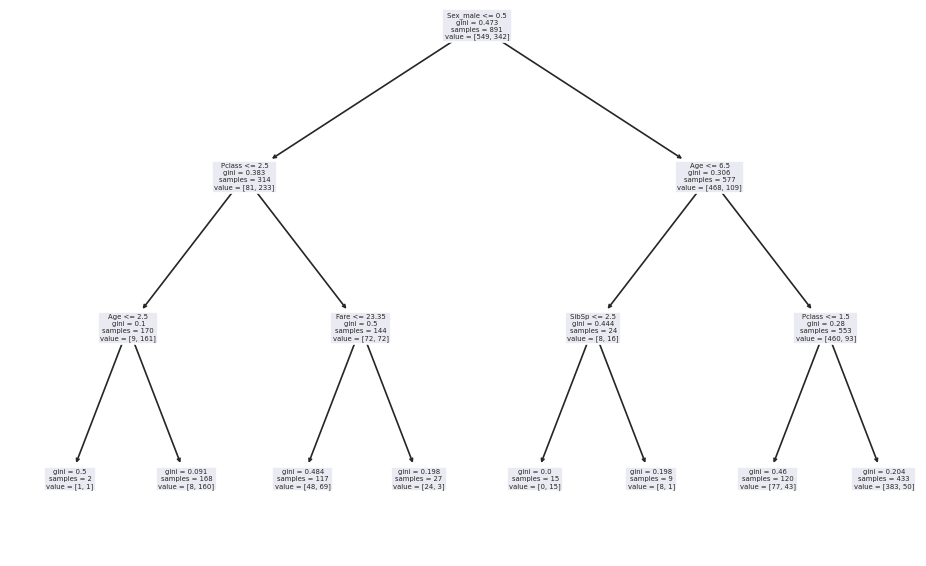

In [ ]:
from sklearn import tree
fig, ax = plt.subplots(dpi=120)
tree.plot_tree(clf, feature_names=X_train.columns,)
print()

## Classifying passengers in test set

In [ ]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,21.0,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,21.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Predict test_set passengers' survival
preds = clf.predict(test_df)

# Seperate survived and dead passengers
survived_df = test_df.loc[preds==1]
dead_df = test_df.loc[preds==0]

# Display them
print("Survived passengers")
display(survived_df)
print("\nDead passengers")
display(dead_df)

Survived passengers


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
6,898,3,30.0,0,0,7.6292,1,0,0,1,0
8,900,3,18.0,0,0,7.2292,1,0,1,0,0
12,904,1,23.0,1,0,82.2667,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750,1,0,0,0,1
410,1302,3,21.0,0,0,7.7500,1,0,0,1,0
411,1303,1,37.0,1,0,90.0000,1,0,0,1,0
412,1304,3,28.0,0,0,7.7750,1,0,0,0,1



Dead passengers


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
5,897,3,14.0,0,0,9.2250,0,1,0,0,1
7,899,2,26.0,1,1,29.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
407,1299,1,50.0,1,1,211.5000,0,1,1,0,0
413,1305,3,21.0,0,0,8.0500,0,1,0,0,1
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,21.0,0,0,8.0500,0,1,0,0,1


In [ ]:
survived_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1095.406667,2.126667,28.450533,0.480000,0.506667,49.519917,0.960000,0.040000,0.273333,0.160000,0.566667
std,122.631608,0.892148,15.042604,0.672768,0.800559,74.076355,0.196616,0.196616,0.447164,0.367834,0.497196
min,893.000000,1.000000,0.170000,0.000000,0.000000,6.950000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,985.000000,1.000000,21.000000,0.000000,0.000000,8.553150,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1092.500000,2.000000,24.000000,0.000000,0.000000,20.787500,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1200.500000,3.000000,36.000000,1.000000,1.000000,54.856275,1.000000,0.000000,1.000000,0.000000,1.000000
max,1306.000000,3.000000,76.000000,4.000000,4.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dead_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,1103.350746,2.343284,28.316866,0.429104,0.328358,27.851407,0.029851,0.970149,0.227612,0.082090,0.690299
std,119.915342,0.803592,12.042670,1.001222,1.065468,40.479776,0.170494,0.170494,0.420075,0.275015,0.463236
min,892.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1000.750000,2.000000,21.000000,0.000000,0.000000,7.854200,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1105.500000,3.000000,24.000000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1208.250000,3.000000,34.125000,1.000000,0.000000,27.720800,0.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,3.000000,67.000000,8.000000,9.000000,262.375000,1.000000,1.000000,1.000000,1.000000,1.000000
